# 1. 자동미분

In [4]:
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [5]:
w = tf.Variable(2.)

def f(w):
    y = w**2
    z = 2*y + 5
    return z

In [7]:
with tf.GradientTape() as tape:
    z = f(w)
    
gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


# 2. 자동 미분을 이용한 선형 회귀 구현

In [10]:
# 학습될 가중치 변수를 선언
w = tf.Variable(4.0)
b = tf.Variable(1.0)

In [11]:
@tf.function
def hypothesis(x):
    return w*x + b

In [13]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [14]:
# 평균 제곱 오차를 손실함수로서 정의
@tf.function
def mse_loss(y_pred, y):
    # 두 개의 차이값을 제곱을 해서 평균을 취한다.
    return tf.reduce_mean(tf.square(y_pred - y))

In [16]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간성적
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되성적는 성적

In [17]:
# 옵티마이저: 경사 하강법, learning late = 0.01
optimizer = tf.optimizers.SGD(0.01)

In [18]:
# 약 300번에 걸친 경사 하강법 수행
for i in range(301):
  with tf.GradientTape() as tape:
    # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
    y_pred = hypothesis(x)

    # 평균 제곱 오차를 계산
    cost = mse_loss(y_pred, y)

  # 손실 함수에 대한 파라미터의 미분값 계산
  gradients = tape.gradient(cost, [w, b])

  # 파라미터 업데이트
  optimizer.apply_gradients(zip(gradients, [w, b]))

  if i % 10 == 0:
    print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, w.numpy(), b.numpy(), cost))

epoch :   0 | w의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | w의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | w의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328165
epoch :  30 | w의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306967
epoch :  40 | w의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | w의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | w의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252898
epoch :  70 | w의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | w의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223598
epoch :  90 | w의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | w의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | w의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | w의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | w의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | w의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | w의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

In [19]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


# 3. 케라스로 구현하는 선형 회귀

In [23]:
# learning rate = 0.01, 손실함수 = MSE, 훈련 횟수 = 300
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

# 출력 y의 차원은 1. 입력 x의 차원(input_dim)은 1
# 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(lr=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# 주어진 x와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(x, y, epochs=300)


Epoch 1/300
1/1 [==============================] - 0s 101ms/step - loss: 3510.1631 - mse: 3510.1631
Epoch 2/300
1/1 [==============================] - 0s 2ms/step - loss: 432.9537 - mse: 432.9537
Epoch 3/300
1/1 [==============================] - 0s 2ms/step - loss: 54.3251 - mse: 54.3251
Epoch 4/300
1/1 [==============================] - 0s 2ms/step - loss: 7.7366 - mse: 7.7366
Epoch 5/300
1/1 [==============================] - 0s 2ms/step - loss: 2.0032 - mse: 2.0032
Epoch 6/300
1/1 [==============================] - 0s 3ms/step - loss: 1.2968 - mse: 1.2968
Epoch 7/300
1/1 [==============================] - 0s 2ms/step - loss: 1.2089 - mse: 1.2089
Epoch 8/300
1/1 [==============================] - 0s 2ms/step - loss: 1.1971 - mse: 1.1971
Epoch 9/300
1/1 [==============================] - 0s 2ms/step - loss: 1.1947 - mse: 1.1947
Epoch 10/300
1/1 [==============================] - 0s 2ms/step - loss: 1.1934 - mse: 1.1934
Epoch 11/300
1/1 [==============================] - 0s 2ms/step -

1/1 [==============================] - 0s 2ms/step - loss: 1.1296 - mse: 1.1296
Epoch 90/300
1/1 [==============================] - 0s 2ms/step - loss: 1.1290 - mse: 1.1290
Epoch 91/300
1/1 [==============================] - 0s 2ms/step - loss: 1.1284 - mse: 1.1284
Epoch 92/300
1/1 [==============================] - 0s 2ms/step - loss: 1.1278 - mse: 1.1278
Epoch 93/300
1/1 [==============================] - 0s 2ms/step - loss: 1.1273 - mse: 1.1273
Epoch 94/300
1/1 [==============================] - 0s 2ms/step - loss: 1.1267 - mse: 1.1267
Epoch 95/300
1/1 [==============================] - 0s 2ms/step - loss: 1.1262 - mse: 1.1262
Epoch 96/300
1/1 [==============================] - 0s 2ms/step - loss: 1.1256 - mse: 1.1256
Epoch 97/300
1/1 [==============================] - 0s 2ms/step - loss: 1.1251 - mse: 1.1251
Epoch 98/300
1/1 [==============================] - 0s 2ms/step - loss: 1.1246 - mse: 1.1246
Epoch 99/300
1/1 [==============================] - 0s 2ms/step - loss: 1.1240 - ms

1/1 [==============================] - 0s 2ms/step - loss: 1.0765 - mse: 1.0765
Epoch 264/300
1/1 [==============================] - 0s 2ms/step - loss: 1.0764 - mse: 1.0764
Epoch 265/300
1/1 [==============================] - 0s 2ms/step - loss: 1.0762 - mse: 1.0762
Epoch 266/300
1/1 [==============================] - 0s 2ms/step - loss: 1.0761 - mse: 1.0761
Epoch 267/300
1/1 [==============================] - 0s 2ms/step - loss: 1.0760 - mse: 1.0760
Epoch 268/300
1/1 [==============================] - 0s 2ms/step - loss: 1.0758 - mse: 1.0758
Epoch 269/300
1/1 [==============================] - 0s 2ms/step - loss: 1.0757 - mse: 1.0757
Epoch 270/300
1/1 [==============================] - 0s 2ms/step - loss: 1.0756 - mse: 1.0756
Epoch 271/300
1/1 [==============================] - 0s 2ms/step - loss: 1.0755 - mse: 1.0755
Epoch 272/300
1/1 [==============================] - 0s 2ms/step - loss: 1.0753 - mse: 1.0753
Epoch 273/300
1/1 [==============================] - 0s 3ms/step - loss: 1

1/1 [==============================] - 0s 42ms/step


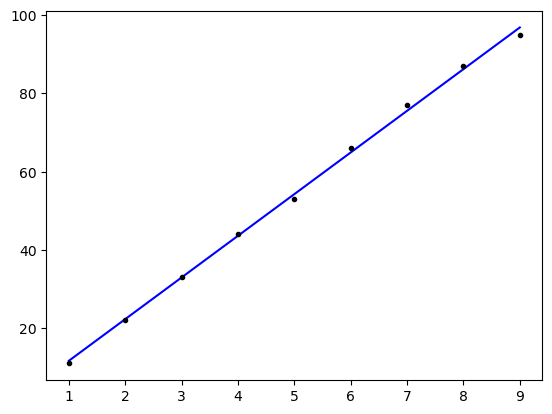

In [24]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

In [25]:
print(model.predict([9.5]))

1/1 [==============================] - 0s 41ms/step
[[102.17468]]


# 로지스틱 회귀
## 1. 케라스로 구현하는 로지스틱 회귀

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) # 숫자 10부터 1

model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))

sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])

model.fit(x, y, epochs=200)


2023-07-21 01:12:36.068350: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/200


2023-07-21 01:12:40.840515: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/leewonseok/anaconda3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 203ms/step - loss: 0.5159 - binary_accuracy: 0.9231
Epoch 2/200
1/1 [==============================] - 0s 2ms/step - loss: 0.5143 - binary_accuracy: 0.9231
Epoch 3/200
1/1 [==============================] - 0s 1ms/step - loss: 0.5127 - binary_accuracy: 0.9231
Epoch 4/200
1/1 [==============================] - 0s 1ms/step - loss: 0.5111 - binary_accuracy: 0.9231
Epoch 5/200
1/1 [==============================] - 0s 1ms/step - loss: 0.5095 - binary_accuracy: 0.9231
Epoch 6/200
1/1 [==============================] - 0s 1ms/step - loss: 0.5079 - binary_accuracy: 0.9231
Epoch 7/200
1/1 [==============================] - 0s 1ms/step - loss: 0.5063 - binary_accuracy: 0.9231
Epoch 8/200
1/1 [==============================] - 0s 1ms/step - loss: 0.5047 - binary_accuracy: 0.9231
Epoch 9/200
1/1 [==============================] - 0s 1ms/step - loss: 0.5031 - binary_accuracy: 0.9231
Epoch 10/200
1/1 [==============================] - 0s 1ms/step - loss: 0.

1/1 [==============================] - 0s 2ms/step - loss: 0.3929 - binary_accuracy: 0.9231
Epoch 80/200
1/1 [==============================] - 0s 1ms/step - loss: 0.3914 - binary_accuracy: 0.9231
Epoch 81/200
1/1 [==============================] - 0s 1ms/step - loss: 0.3898 - binary_accuracy: 0.9231
Epoch 82/200
1/1 [==============================] - 0s 1ms/step - loss: 0.3883 - binary_accuracy: 0.9231
Epoch 83/200
1/1 [==============================] - 0s 1ms/step - loss: 0.3867 - binary_accuracy: 0.9231
Epoch 84/200
1/1 [==============================] - 0s 1ms/step - loss: 0.3852 - binary_accuracy: 0.9231
Epoch 85/200
1/1 [==============================] - 0s 2ms/step - loss: 0.3837 - binary_accuracy: 0.9231
Epoch 86/200
1/1 [==============================] - 0s 2ms/step - loss: 0.3821 - binary_accuracy: 0.9231
Epoch 87/200
1/1 [==============================] - 0s 2ms/step - loss: 0.3806 - binary_accuracy: 0.9231
Epoch 88/200
1/1 [==============================] - 0s 1ms/step - lo

1/1 [==============================] - 0s 1ms/step - loss: 0.2802 - binary_accuracy: 0.9231
Epoch 157/200
1/1 [==============================] - 0s 1ms/step - loss: 0.2789 - binary_accuracy: 0.9231
Epoch 158/200
1/1 [==============================] - 0s 1ms/step - loss: 0.2776 - binary_accuracy: 0.9231
Epoch 159/200
1/1 [==============================] - 0s 2ms/step - loss: 0.2762 - binary_accuracy: 0.9231
Epoch 160/200
1/1 [==============================] - 0s 1ms/step - loss: 0.2749 - binary_accuracy: 0.9231
Epoch 161/200
1/1 [==============================] - 0s 1ms/step - loss: 0.2736 - binary_accuracy: 0.9231
Epoch 162/200
1/1 [==============================] - 0s 1ms/step - loss: 0.2723 - binary_accuracy: 0.9231
Epoch 163/200
1/1 [==============================] - 0s 1ms/step - loss: 0.2710 - binary_accuracy: 0.9231
Epoch 164/200
1/1 [==============================] - 0s 1ms/step - loss: 0.2697 - binary_accuracy: 0.9231
Epoch 165/200
1/1 [==============================] - 0s 2ms/

1/1 [==============================] - 0s 21ms/step


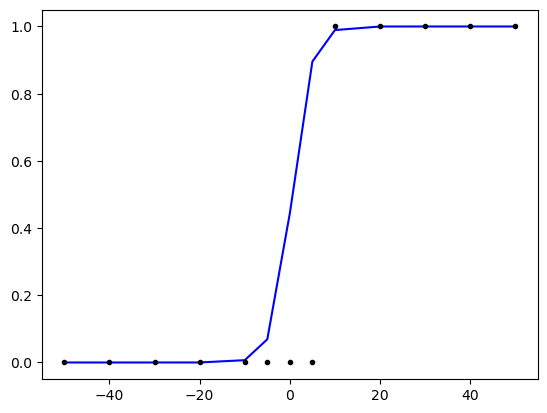

In [3]:
plt.plot(x, model.predict(x), 'b', x,y, 'k.')

In [4]:
print(model.predict([1, 2, 3, 4, 4.5]))
print(model.predict([11, 21, 31, 41, 500]))


1/1 [==============================] - 0s 42ms/step
[[0.56221783]
 [0.67380893]
 [0.76865965]
 [0.84238124]
 [0.87143433]]
1/1 [==============================] - 0s 20ms/step
[[0.99332786]
 [0.99994206]
 [0.9999995 ]
 [1.        ]
 [1.        ]]


# 다중 입력에 대한 실습
## 1. 다중 선형 회귀

In [5]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [6]:
# 중간 고사, 기말 고사, 가산점 점수
X = np.array([[70,85,11], [71,89,18], [50,80,20], [99,20,10], [50,10,10]]) 
y = np.array([73, 82 ,72, 57, 34]) # 최종 성적

model = Sequential()
model.add(Dense(1, input_dim=3, activation='linear'))

sgd = optimizers.SGD(learning_rate=0.0001)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(X, y, epochs=2000)


Epoch 1/2000
1/1 [==============================] - 0s 104ms/step - loss: 8646.6836 - mse: 8646.6836
Epoch 2/2000
1/1 [==============================] - 0s 1ms/step - loss: 4777.7217 - mse: 4777.7217
Epoch 3/2000
1/1 [==============================] - 0s 1ms/step - loss: 2669.5334 - mse: 2669.5334
Epoch 4/2000
1/1 [==============================] - 0s 2ms/step - loss: 1512.4805 - mse: 1512.4805
Epoch 5/2000
1/1 [==============================] - 0s 1ms/step - loss: 872.0844 - mse: 872.0844
Epoch 6/2000
1/1 [==============================] - 0s 1ms/step - loss: 514.1998 - mse: 514.1998
Epoch 7/2000
1/1 [==============================] - 0s 1ms/step - loss: 311.9989 - mse: 311.9989
Epoch 8/2000
1/1 [==============================] - 0s 1ms/step - loss: 196.3640 - mse: 196.3640
Epoch 9/2000
1/1 [==============================] - 0s 1ms/step - loss: 129.3560 - mse: 129.3560
Epoch 10/2000
1/1 [==============================] - 0s 1ms/step - loss: 89.9739 - mse: 89.9739
Epoch 11/2000
1/1 [==

1/1 [==============================] - 0s 1ms/step - loss: 17.7827 - mse: 17.7827
Epoch 87/2000
1/1 [==============================] - 0s 1ms/step - loss: 17.6640 - mse: 17.6640
Epoch 88/2000
1/1 [==============================] - 0s 2ms/step - loss: 17.5460 - mse: 17.5460
Epoch 89/2000
1/1 [==============================] - 0s 2ms/step - loss: 17.4289 - mse: 17.4289
Epoch 90/2000
1/1 [==============================] - 0s 2ms/step - loss: 17.3124 - mse: 17.3124
Epoch 91/2000
1/1 [==============================] - 0s 2ms/step - loss: 17.1968 - mse: 17.1968
Epoch 92/2000
1/1 [==============================] - 0s 2ms/step - loss: 17.0820 - mse: 17.0820
Epoch 93/2000
1/1 [==============================] - 0s 2ms/step - loss: 16.9679 - mse: 16.9679
Epoch 94/2000
1/1 [==============================] - 0s 2ms/step - loss: 16.8546 - mse: 16.8546
Epoch 95/2000
1/1 [==============================] - 0s 2ms/step - loss: 16.7420 - mse: 16.7420
Epoch 96/2000
1/1 [==============================] - 0

1/1 [==============================] - 0s 1ms/step - loss: 10.1298 - mse: 10.1298
Epoch 171/2000
1/1 [==============================] - 0s 1ms/step - loss: 10.0622 - mse: 10.0622
Epoch 172/2000
1/1 [==============================] - 0s 2ms/step - loss: 9.9950 - mse: 9.9950
Epoch 173/2000
1/1 [==============================] - 0s 1ms/step - loss: 9.9283 - mse: 9.9283
Epoch 174/2000
1/1 [==============================] - 0s 1ms/step - loss: 9.8620 - mse: 9.8620
Epoch 175/2000
1/1 [==============================] - 0s 1ms/step - loss: 9.7962 - mse: 9.7962
Epoch 176/2000
1/1 [==============================] - 0s 1ms/step - loss: 9.7308 - mse: 9.7308
Epoch 177/2000
1/1 [==============================] - 0s 1ms/step - loss: 9.6659 - mse: 9.6659
Epoch 178/2000
1/1 [==============================] - 0s 1ms/step - loss: 9.6013 - mse: 9.6013
Epoch 179/2000
1/1 [==============================] - 0s 2ms/step - loss: 9.5372 - mse: 9.5372
Epoch 180/2000
1/1 [==============================] - 0s 2ms/

1/1 [==============================] - 0s 2ms/step - loss: 5.6959 - mse: 5.6959
Epoch 257/2000
1/1 [==============================] - 0s 1ms/step - loss: 5.6579 - mse: 5.6579
Epoch 258/2000
1/1 [==============================] - 0s 1ms/step - loss: 5.6202 - mse: 5.6202
Epoch 259/2000
1/1 [==============================] - 0s 1ms/step - loss: 5.5827 - mse: 5.5827
Epoch 260/2000
1/1 [==============================] - 0s 1ms/step - loss: 5.5455 - mse: 5.5455
Epoch 261/2000
1/1 [==============================] - 0s 1ms/step - loss: 5.5085 - mse: 5.5085
Epoch 262/2000
1/1 [==============================] - 0s 2ms/step - loss: 5.4718 - mse: 5.4718
Epoch 263/2000
1/1 [==============================] - 0s 2ms/step - loss: 5.4353 - mse: 5.4353
Epoch 264/2000
1/1 [==============================] - 0s 1ms/step - loss: 5.3991 - mse: 5.3991
Epoch 265/2000
1/1 [==============================] - 0s 1ms/step - loss: 5.3631 - mse: 5.3631
Epoch 266/2000
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 2ms/step - loss: 3.2052 - mse: 3.2052
Epoch 343/2000
1/1 [==============================] - 0s 1ms/step - loss: 3.1838 - mse: 3.1838
Epoch 344/2000
1/1 [==============================] - 0s 2ms/step - loss: 3.1627 - mse: 3.1627
Epoch 345/2000
1/1 [==============================] - 0s 1ms/step - loss: 3.1416 - mse: 3.1416
Epoch 346/2000
1/1 [==============================] - 0s 1ms/step - loss: 3.1207 - mse: 3.1207
Epoch 347/2000
1/1 [==============================] - 0s 1ms/step - loss: 3.0999 - mse: 3.0999
Epoch 348/2000
1/1 [==============================] - 0s 2ms/step - loss: 3.0793 - mse: 3.0793
Epoch 349/2000
1/1 [==============================] - 0s 1ms/step - loss: 3.0588 - mse: 3.0588
Epoch 350/2000
1/1 [==============================] - 0s 2ms/step - loss: 3.0384 - mse: 3.0384
Epoch 351/2000
1/1 [==============================] - 0s 1ms/step - loss: 3.0182 - mse: 3.0182
Epoch 352/2000
1/1 [==============================] - 0s 1ms/step

1/1 [==============================] - 0s 2ms/step - loss: 1.8060 - mse: 1.8060
Epoch 429/2000
1/1 [==============================] - 0s 1ms/step - loss: 1.7940 - mse: 1.7940
Epoch 430/2000
1/1 [==============================] - 0s 1ms/step - loss: 1.7821 - mse: 1.7821
Epoch 431/2000
1/1 [==============================] - 0s 2ms/step - loss: 1.7703 - mse: 1.7703
Epoch 432/2000
1/1 [==============================] - 0s 1ms/step - loss: 1.7585 - mse: 1.7585
Epoch 433/2000
1/1 [==============================] - 0s 1ms/step - loss: 1.7469 - mse: 1.7469
Epoch 434/2000
1/1 [==============================] - 0s 2ms/step - loss: 1.7353 - mse: 1.7353
Epoch 435/2000
1/1 [==============================] - 0s 2ms/step - loss: 1.7238 - mse: 1.7238
Epoch 436/2000
1/1 [==============================] - 0s 1ms/step - loss: 1.7123 - mse: 1.7123
Epoch 437/2000
1/1 [==============================] - 0s 1ms/step - loss: 1.7010 - mse: 1.7010
Epoch 438/2000
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 1ms/step - loss: 1.0200 - mse: 1.0200
Epoch 515/2000
1/1 [==============================] - 0s 1ms/step - loss: 1.0133 - mse: 1.0133
Epoch 516/2000
1/1 [==============================] - 0s 1ms/step - loss: 1.0066 - mse: 1.0066
Epoch 517/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.9999 - mse: 0.9999
Epoch 518/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.9933 - mse: 0.9933
Epoch 519/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.9868 - mse: 0.9868
Epoch 520/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.9803 - mse: 0.9803
Epoch 521/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.9738 - mse: 0.9738
Epoch 522/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.9674 - mse: 0.9674
Epoch 523/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.9610 - mse: 0.9610
Epoch 524/2000
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 1ms/step - loss: 0.5785 - mse: 0.5785
Epoch 601/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5747 - mse: 0.5747
Epoch 602/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5709 - mse: 0.5709
Epoch 603/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5672 - mse: 0.5672
Epoch 604/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5635 - mse: 0.5635
Epoch 605/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5598 - mse: 0.5598
Epoch 606/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5561 - mse: 0.5561
Epoch 607/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5525 - mse: 0.5525
Epoch 608/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5489 - mse: 0.5489
Epoch 609/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5453 - mse: 0.5453
Epoch 610/2000
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 1ms/step - loss: 0.3304 - mse: 0.3304
Epoch 687/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.3283 - mse: 0.3283
Epoch 688/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.3262 - mse: 0.3262
Epoch 689/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.3241 - mse: 0.3241
Epoch 690/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3220 - mse: 0.3220
Epoch 691/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3199 - mse: 0.3199
Epoch 692/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3179 - mse: 0.3179
Epoch 693/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.3158 - mse: 0.3158
Epoch 694/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.3138 - mse: 0.3138
Epoch 695/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3118 - mse: 0.3118
Epoch 696/2000
1/1 [==============================] - 0s 1ms/step

1/1 [==============================] - 0s 2ms/step - loss: 0.1911 - mse: 0.1911
Epoch 773/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.1899 - mse: 0.1899
Epoch 774/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.1887 - mse: 0.1887
Epoch 775/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.1875 - mse: 0.1875
Epoch 776/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.1863 - mse: 0.1863
Epoch 777/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.1852 - mse: 0.1852
Epoch 778/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.1840 - mse: 0.1840
Epoch 779/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.1829 - mse: 0.1829
Epoch 780/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.1817 - mse: 0.1817
Epoch 781/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.1806 - mse: 0.1806
Epoch 782/2000
1/1 [==============================] - 0s 1ms/step

1/1 [==============================] - 0s 2ms/step - loss: 0.1128 - mse: 0.1128
Epoch 859/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.1121 - mse: 0.1121
Epoch 860/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.1115 - mse: 0.1115
Epoch 861/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.1108 - mse: 0.1108
Epoch 862/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.1101 - mse: 0.1101
Epoch 863/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.1095 - mse: 0.1095
Epoch 864/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1088 - mse: 0.1088
Epoch 865/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1082 - mse: 0.1082
Epoch 866/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.1076 - mse: 0.1076
Epoch 867/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.1069 - mse: 0.1069
Epoch 868/2000
1/1 [==============================] - 0s 1ms/step

1/1 [==============================] - 0s 1ms/step - loss: 0.0688 - mse: 0.0688
Epoch 945/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0684 - mse: 0.0684
Epoch 946/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0681 - mse: 0.0681
Epoch 947/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0677 - mse: 0.0677
Epoch 948/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0673 - mse: 0.0673
Epoch 949/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0670 - mse: 0.0670
Epoch 950/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0666 - mse: 0.0666
Epoch 951/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0662 - mse: 0.0662
Epoch 952/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0659 - mse: 0.0659
Epoch 953/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0655 - mse: 0.0655
Epoch 954/2000
1/1 [==============================] - 0s 1ms/step

1/1 [==============================] - 0s 1ms/step - loss: 0.0441 - mse: 0.0441
Epoch 1031/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0439 - mse: 0.0439
Epoch 1032/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0437 - mse: 0.0437
Epoch 1033/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0435 - mse: 0.0435
Epoch 1034/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0433 - mse: 0.0433
Epoch 1035/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0431 - mse: 0.0431
Epoch 1036/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0429 - mse: 0.0429
Epoch 1037/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0427 - mse: 0.0427
Epoch 1038/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0425 - mse: 0.0425
Epoch 1039/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0423 - mse: 0.0423
Epoch 1040/2000
1/1 [==============================] - 0

1/1 [==============================] - 0s 1ms/step - loss: 0.0304 - mse: 0.0304
Epoch 1116/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0302 - mse: 0.0302
Epoch 1117/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0301 - mse: 0.0301
Epoch 1118/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0300 - mse: 0.0300
Epoch 1119/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0299 - mse: 0.0299
Epoch 1120/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0298 - mse: 0.0298
Epoch 1121/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0296 - mse: 0.0296
Epoch 1122/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0295 - mse: 0.0295
Epoch 1123/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0294 - mse: 0.0294
Epoch 1124/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0293 - mse: 0.0293
Epoch 1125/2000
1/1 [==============================] - 0

1/1 [==============================] - 0s 1ms/step - loss: 0.0226 - mse: 0.0226
Epoch 1201/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0225 - mse: 0.0225
Epoch 1202/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0224 - mse: 0.0224
Epoch 1203/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0224 - mse: 0.0224
Epoch 1204/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0223 - mse: 0.0223
Epoch 1205/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0222 - mse: 0.0222
Epoch 1206/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0222 - mse: 0.0222
Epoch 1207/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0221 - mse: 0.0221
Epoch 1208/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0220 - mse: 0.0220
Epoch 1209/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0220 - mse: 0.0220
Epoch 1210/2000
1/1 [==============================] - 0

1/1 [==============================] - 0s 1ms/step - loss: 0.0182 - mse: 0.0182
Epoch 1286/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0181 - mse: 0.0181
Epoch 1287/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0181 - mse: 0.0181
Epoch 1288/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0180 - mse: 0.0180
Epoch 1289/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0180 - mse: 0.0180
Epoch 1290/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0180 - mse: 0.0180
Epoch 1291/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0179 - mse: 0.0179
Epoch 1292/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0179 - mse: 0.0179
Epoch 1293/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0179 - mse: 0.0179
Epoch 1294/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0178 - mse: 0.0178
Epoch 1295/2000
1/1 [==============================] - 0

1/1 [==============================] - 0s 1ms/step - loss: 0.0157 - mse: 0.0157
Epoch 1371/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0156 - mse: 0.0156
Epoch 1372/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0156 - mse: 0.0156
Epoch 1373/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0156 - mse: 0.0156
Epoch 1374/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0156 - mse: 0.0156
Epoch 1375/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0156 - mse: 0.0156
Epoch 1376/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0155 - mse: 0.0155
Epoch 1377/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0155 - mse: 0.0155
Epoch 1378/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0155 - mse: 0.0155
Epoch 1379/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0155 - mse: 0.0155
Epoch 1380/2000
1/1 [==============================] - 0

1/1 [==============================] - 0s 1ms/step - loss: 0.0143 - mse: 0.0143
Epoch 1456/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0142 - mse: 0.0142
Epoch 1457/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0142 - mse: 0.0142
Epoch 1458/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0142 - mse: 0.0142
Epoch 1459/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0142 - mse: 0.0142
Epoch 1460/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0142 - mse: 0.0142
Epoch 1461/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0142 - mse: 0.0142
Epoch 1462/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0142 - mse: 0.0142
Epoch 1463/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0142 - mse: 0.0142
Epoch 1464/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0141 - mse: 0.0141
Epoch 1465/2000
1/1 [==============================] - 0

1/1 [==============================] - 0s 1ms/step - loss: 0.0134 - mse: 0.0134
Epoch 1541/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0134 - mse: 0.0134
Epoch 1542/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0134 - mse: 0.0134
Epoch 1543/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0134 - mse: 0.0134
Epoch 1544/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0134 - mse: 0.0134
Epoch 1545/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0134 - mse: 0.0134
Epoch 1546/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0134 - mse: 0.0134
Epoch 1547/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0134 - mse: 0.0134
Epoch 1548/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0134 - mse: 0.0134
Epoch 1549/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0134 - mse: 0.0134
Epoch 1550/2000
1/1 [==============================] - 0

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - 0s 1ms/step - loss: 0.0125 - mse: 0.0125
Epoch 1837/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0125 - mse: 0.0125
Epoch 1838/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0125 - mse: 0.0125
Epoch 1839/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0125 - mse: 0.0125
Epoch 1840/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0125 - mse: 0.0125
Epoch 1841/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0125 - mse: 0.0125
Epoch 1842/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0125 - mse: 0.0125
Epoch 1843/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0125 - mse: 0.0125
Epoch 1844/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0125 - mse: 0.0125
Epoch 1845/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0125 - mse: 0.0125
Epoch 1846/2000
1/1 [==============================] - 0

1/1 [==============================] - 0s 1ms/step - loss: 0.0125 - mse: 0.0125
Epoch 1922/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0125 - mse: 0.0125
Epoch 1923/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0125 - mse: 0.0125
Epoch 1924/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0125 - mse: 0.0125
Epoch 1925/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0125 - mse: 0.0125
Epoch 1926/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0125 - mse: 0.0125
Epoch 1927/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0125 - mse: 0.0125
Epoch 1928/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0125 - mse: 0.0125
Epoch 1929/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0125 - mse: 0.0125
Epoch 1930/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0125 - mse: 0.0125
Epoch 1931/2000
1/1 [==============================] - 0

In [7]:
print(model.predict(X))

1/1 [==============================] - 0s 32ms/step
[[72.94    ]
 [81.97281 ]
 [72.08983 ]
 [57.113605]
 [33.808144]]


In [8]:
X_test = np.array([[20,99,10], [40,50,20]])
print(model.predict(X_test))

1/1 [==============================] - 0s 17ms/step
[[57.921696]
 [56.051987]]


## 2. 다중 로지스틱 회귀

In [9]:
X = np.array([[0, 0], [0, 1], [1, 0], [0, 2], [1, 1], [2, 0]])
y = np.array([0, 0, 0, 1, 1, 1])

model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])

model.fit(X, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 129ms/step - loss: 0.9834 - binary_accuracy: 0.5000
Epoch 2/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.9820 - binary_accuracy: 0.3333
Epoch 3/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.9805 - binary_accuracy: 0.3333
Epoch 4/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.9791 - binary_accuracy: 0.3333
Epoch 5/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.9777 - binary_accuracy: 0.3333
Epoch 6/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.9762 - binary_accuracy: 0.3333
Epoch 7/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.9748 - binary_accuracy: 0.3333
Epoch 8/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.9734 - binary_accuracy: 0.3333
Epoch 9/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.9720 - binary_accuracy: 0.3333
Epoch 10/2000
1/1 [==============================] - 

1/1 [==============================] - 0s 1ms/step - loss: 0.8842 - binary_accuracy: 0.3333
Epoch 79/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.8830 - binary_accuracy: 0.3333
Epoch 80/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.8819 - binary_accuracy: 0.3333
Epoch 81/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.8808 - binary_accuracy: 0.3333
Epoch 82/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.8796 - binary_accuracy: 0.3333
Epoch 83/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.8785 - binary_accuracy: 0.3333
Epoch 84/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.8774 - binary_accuracy: 0.3333
Epoch 85/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.8763 - binary_accuracy: 0.3333
Epoch 86/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.8751 - binary_accuracy: 0.3333
Epoch 87/2000
1/1 [==============================] - 0s 2ms/

1/1 [==============================] - 0s 1ms/step - loss: 0.8070 - binary_accuracy: 0.5000
Epoch 155/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.8061 - binary_accuracy: 0.5000
Epoch 156/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.8052 - binary_accuracy: 0.5000
Epoch 157/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.8044 - binary_accuracy: 0.5000
Epoch 158/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.8035 - binary_accuracy: 0.5000
Epoch 159/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.8026 - binary_accuracy: 0.5000
Epoch 160/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.8017 - binary_accuracy: 0.5000
Epoch 161/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.8008 - binary_accuracy: 0.5000
Epoch 162/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.8000 - binary_accuracy: 0.5000
Epoch 163/2000
1/1 [==============================] 

1/1 [==============================] - 0s 2ms/step - loss: 0.7467 - binary_accuracy: 0.6667
Epoch 231/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.7460 - binary_accuracy: 0.6667
Epoch 232/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.7453 - binary_accuracy: 0.6667
Epoch 233/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.7446 - binary_accuracy: 0.6667
Epoch 234/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.7439 - binary_accuracy: 0.6667
Epoch 235/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.7432 - binary_accuracy: 0.6667
Epoch 236/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.7426 - binary_accuracy: 0.6667
Epoch 237/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.7419 - binary_accuracy: 0.6667
Epoch 238/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.7412 - binary_accuracy: 0.6667
Epoch 239/2000
1/1 [==============================] 

1/1 [==============================] - 0s 1ms/step - loss: 0.6993 - binary_accuracy: 0.6667
Epoch 307/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6988 - binary_accuracy: 0.6667
Epoch 308/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6982 - binary_accuracy: 0.6667
Epoch 309/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6977 - binary_accuracy: 0.6667
Epoch 310/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6971 - binary_accuracy: 0.6667
Epoch 311/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6966 - binary_accuracy: 0.6667
Epoch 312/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6960 - binary_accuracy: 0.6667
Epoch 313/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6955 - binary_accuracy: 0.6667
Epoch 314/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6950 - binary_accuracy: 0.6667
Epoch 315/2000
1/1 [==============================] 

1/1 [==============================] - 0s 1ms/step - loss: 0.6614 - binary_accuracy: 0.6667
Epoch 383/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6610 - binary_accuracy: 0.6667
Epoch 384/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6606 - binary_accuracy: 0.6667
Epoch 385/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6601 - binary_accuracy: 0.6667
Epoch 386/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6597 - binary_accuracy: 0.6667
Epoch 387/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6592 - binary_accuracy: 0.6667
Epoch 388/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6588 - binary_accuracy: 0.6667
Epoch 389/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6583 - binary_accuracy: 0.6667
Epoch 390/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6579 - binary_accuracy: 0.6667
Epoch 391/2000
1/1 [==============================] 

1/1 [==============================] - 0s 1ms/step - loss: 0.6304 - binary_accuracy: 0.6667
Epoch 459/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6300 - binary_accuracy: 0.6667
Epoch 460/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6296 - binary_accuracy: 0.6667
Epoch 461/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6293 - binary_accuracy: 0.6667
Epoch 462/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6289 - binary_accuracy: 0.6667
Epoch 463/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6285 - binary_accuracy: 0.6667
Epoch 464/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6282 - binary_accuracy: 0.6667
Epoch 465/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6278 - binary_accuracy: 0.6667
Epoch 466/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6274 - binary_accuracy: 0.6667
Epoch 467/2000
1/1 [==============================] 

1/1 [==============================] - 0s 1ms/step - loss: 0.6042 - binary_accuracy: 0.6667
Epoch 535/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6039 - binary_accuracy: 0.6667
Epoch 536/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6036 - binary_accuracy: 0.6667
Epoch 537/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6033 - binary_accuracy: 0.6667
Epoch 538/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6030 - binary_accuracy: 0.6667
Epoch 539/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6027 - binary_accuracy: 0.6667
Epoch 540/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6024 - binary_accuracy: 0.6667
Epoch 541/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6020 - binary_accuracy: 0.6667
Epoch 542/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6017 - binary_accuracy: 0.6667
Epoch 543/2000
1/1 [==============================] 

1/1 [==============================] - 0s 2ms/step - loss: 0.5818 - binary_accuracy: 0.8333
Epoch 611/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5815 - binary_accuracy: 0.8333
Epoch 612/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5812 - binary_accuracy: 0.8333
Epoch 613/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5809 - binary_accuracy: 0.8333
Epoch 614/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5807 - binary_accuracy: 0.8333
Epoch 615/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5804 - binary_accuracy: 0.8333
Epoch 616/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5801 - binary_accuracy: 0.8333
Epoch 617/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5798 - binary_accuracy: 0.8333
Epoch 618/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5796 - binary_accuracy: 0.8333
Epoch 619/2000
1/1 [==============================] 

1/1 [==============================] - 0s 3ms/step - loss: 0.5621 - binary_accuracy: 0.8333
Epoch 687/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5618 - binary_accuracy: 0.8333
Epoch 688/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5616 - binary_accuracy: 0.8333
Epoch 689/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5613 - binary_accuracy: 0.8333
Epoch 690/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5611 - binary_accuracy: 0.8333
Epoch 691/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5609 - binary_accuracy: 0.8333
Epoch 692/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5606 - binary_accuracy: 0.8333
Epoch 693/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5604 - binary_accuracy: 0.8333
Epoch 694/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5601 - binary_accuracy: 0.8333
Epoch 695/2000
1/1 [==============================] 

1/1 [==============================] - 0s 1ms/step - loss: 0.5445 - binary_accuracy: 0.8333
Epoch 763/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5443 - binary_accuracy: 0.8333
Epoch 764/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5441 - binary_accuracy: 0.8333
Epoch 765/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5439 - binary_accuracy: 0.8333
Epoch 766/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5437 - binary_accuracy: 0.8333
Epoch 767/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5435 - binary_accuracy: 0.8333
Epoch 768/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5432 - binary_accuracy: 0.8333
Epoch 769/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5430 - binary_accuracy: 0.8333
Epoch 770/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5428 - binary_accuracy: 0.8333
Epoch 771/2000
1/1 [==============================] 

1/1 [==============================] - 0s 1ms/step - loss: 0.5288 - binary_accuracy: 0.8333
Epoch 839/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5286 - binary_accuracy: 0.8333
Epoch 840/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5284 - binary_accuracy: 0.8333
Epoch 841/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5282 - binary_accuracy: 0.8333
Epoch 842/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5280 - binary_accuracy: 0.8333
Epoch 843/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5278 - binary_accuracy: 0.8333
Epoch 844/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5276 - binary_accuracy: 0.8333
Epoch 845/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5274 - binary_accuracy: 0.8333
Epoch 846/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5272 - binary_accuracy: 0.8333
Epoch 847/2000
1/1 [==============================] 

1/1 [==============================] - 0s 1ms/step - loss: 0.5144 - binary_accuracy: 0.8333
Epoch 915/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5142 - binary_accuracy: 0.8333
Epoch 916/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5140 - binary_accuracy: 0.8333
Epoch 917/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5139 - binary_accuracy: 0.8333
Epoch 918/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5137 - binary_accuracy: 0.8333
Epoch 919/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5135 - binary_accuracy: 0.8333
Epoch 920/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5133 - binary_accuracy: 0.8333
Epoch 921/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5131 - binary_accuracy: 0.8333
Epoch 922/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5130 - binary_accuracy: 0.8333
Epoch 923/2000
1/1 [==============================] 

1/1 [==============================] - 0s 2ms/step - loss: 0.5012 - binary_accuracy: 0.8333
Epoch 991/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5010 - binary_accuracy: 0.8333
Epoch 992/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5009 - binary_accuracy: 0.8333
Epoch 993/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5007 - binary_accuracy: 0.8333
Epoch 994/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5005 - binary_accuracy: 0.8333
Epoch 995/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5004 - binary_accuracy: 0.8333
Epoch 996/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5002 - binary_accuracy: 0.8333
Epoch 997/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5001 - binary_accuracy: 0.8333
Epoch 998/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4999 - binary_accuracy: 0.8333
Epoch 999/2000
1/1 [==============================] 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 1508/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4317 - binary_accuracy: 0.8333
Epoch 1509/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4316 - binary_accuracy: 0.8333
Epoch 1510/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4315 - binary_accuracy: 0.8333
Epoch 1511/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4314 - binary_accuracy: 0.8333
Epoch 1512/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4313 - binary_accuracy: 0.8333
Epoch 1513/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4312 - binary_accuracy: 0.8333
Epoch 1514/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4311 - binary_accuracy: 0.8333
Epoch 1515/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4310 - binary_accuracy: 0.8333
Epoch 1516/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4309 - binary_accuracy: 0.8333
Epoch 1517/2000
1/1 [=======

1/1 [==============================] - 0s 1ms/step - loss: 0.4237 - binary_accuracy: 0.8333
Epoch 1584/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4236 - binary_accuracy: 0.8333
Epoch 1585/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4235 - binary_accuracy: 0.8333
Epoch 1586/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4234 - binary_accuracy: 0.8333
Epoch 1587/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4233 - binary_accuracy: 0.8333
Epoch 1588/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4232 - binary_accuracy: 0.8333
Epoch 1589/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4231 - binary_accuracy: 0.8333
Epoch 1590/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4230 - binary_accuracy: 0.8333
Epoch 1591/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4229 - binary_accuracy: 0.8333
Epoch 1592/2000
1/1 [=======================

1/1 [==============================] - 0s 1ms/step - loss: 0.4159 - binary_accuracy: 0.8333
Epoch 1660/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4158 - binary_accuracy: 0.8333
Epoch 1661/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4157 - binary_accuracy: 0.8333
Epoch 1662/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4156 - binary_accuracy: 0.8333
Epoch 1663/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4155 - binary_accuracy: 1.0000
Epoch 1664/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4154 - binary_accuracy: 1.0000
Epoch 1665/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4153 - binary_accuracy: 1.0000
Epoch 1666/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4152 - binary_accuracy: 1.0000
Epoch 1667/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4151 - binary_accuracy: 1.0000
Epoch 1668/2000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.4084 - binary_accuracy: 1.0000
Epoch 1736/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4083 - binary_accuracy: 1.0000
Epoch 1737/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4083 - binary_accuracy: 1.0000
Epoch 1738/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4082 - binary_accuracy: 1.0000
Epoch 1739/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4081 - binary_accuracy: 1.0000
Epoch 1740/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4080 - binary_accuracy: 1.0000
Epoch 1741/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4079 - binary_accuracy: 1.0000
Epoch 1742/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4078 - binary_accuracy: 1.0000
Epoch 1743/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4077 - binary_accuracy: 1.0000
Epoch 1744/2000
1/1 [=======================

1/1 [==============================] - 0s 1ms/step - loss: 0.4013 - binary_accuracy: 1.0000
Epoch 1812/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4012 - binary_accuracy: 1.0000
Epoch 1813/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4011 - binary_accuracy: 1.0000
Epoch 1814/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4010 - binary_accuracy: 1.0000
Epoch 1815/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4009 - binary_accuracy: 1.0000
Epoch 1816/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4008 - binary_accuracy: 1.0000
Epoch 1817/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4008 - binary_accuracy: 1.0000
Epoch 1818/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4007 - binary_accuracy: 1.0000
Epoch 1819/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4006 - binary_accuracy: 1.0000
Epoch 1820/2000
1/1 [=======================

1/1 [==============================] - 0s 1ms/step - loss: 0.3945 - binary_accuracy: 1.0000
Epoch 1888/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.3944 - binary_accuracy: 1.0000
Epoch 1889/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3943 - binary_accuracy: 1.0000
Epoch 1890/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.3942 - binary_accuracy: 1.0000
Epoch 1891/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.3941 - binary_accuracy: 1.0000
Epoch 1892/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.3940 - binary_accuracy: 1.0000
Epoch 1893/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.3939 - binary_accuracy: 1.0000
Epoch 1894/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.3938 - binary_accuracy: 1.0000
Epoch 1895/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.3938 - binary_accuracy: 1.0000
Epoch 1896/2000
1/1 [=======================

1/1 [==============================] - 0s 1ms/step - loss: 0.3879 - binary_accuracy: 1.0000
Epoch 1964/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.3878 - binary_accuracy: 1.0000
Epoch 1965/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.3877 - binary_accuracy: 1.0000
Epoch 1966/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.3876 - binary_accuracy: 1.0000
Epoch 1967/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.3875 - binary_accuracy: 1.0000
Epoch 1968/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3875 - binary_accuracy: 1.0000
Epoch 1969/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3874 - binary_accuracy: 1.0000
Epoch 1970/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3873 - binary_accuracy: 1.0000
Epoch 1971/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3872 - binary_accuracy: 1.0000
Epoch 1972/2000
1/1 [=======================

In [10]:
print(model.predict(X))

1/1 [==============================] - 0s 31ms/step
[[0.19611147]
 [0.47387013]
 [0.457766  ]
 [0.76879996]
 [0.7570959 ]
 [0.7449957 ]]


# 벡터와 행렬 연산

In [12]:
import numpy as np

In [13]:
# Numpy를 이용해 텐서를 설명
# 0차원 텐서(스칼라)
d = np.array(5)
print('텐서의 차원 :',d.ndim)
print('텐서의 크기(shape) :',d.shape)

텐서의 차원 : 0
텐서의 크기(shape) : ()


In [14]:
# 1차원 텐서(벡터)
d = np.array([1, 2, 3, 4])
print('텐서의 차원 :',d.ndim)
print('텐서의 크기(shape) :',d.shape)

텐서의 차원 : 1
텐서의 크기(shape) : (4,)


In [15]:
# 2차원 텐서(행렬)
# 3행 4열의 행렬
d = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print('텐서의 차원 :',d.ndim)
print('텐서의 크기(shape) :',d.shape)

텐서의 차원 : 2
텐서의 크기(shape) : (3, 4)


In [17]:
# 3차원 텐서(다차원 배열)
d = np.array([
            [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [10, 11, 12, 13, 14]],
            [[15, 16, 17, 18, 19], [19, 20, 21, 22, 23], [23, 24, 25, 26, 27]]
            ])
print('텐서의 차원 :',d.ndim)
print('텐서의 크기(shape) :',d.shape)

텐서의 차원 : 3
텐서의 크기(shape) : (2, 3, 5)


# 소프트맥스 회귀 실습
## 1. 아이리스 품종 데이터에 대한 이해

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [19]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/06.%20Machine%20Learning/dataset/Iris.csv", filename="Iris.csv")

data = pd.read_csv('Iris.csv', encoding='latin1')

print('샘플의 개수 :', len(data))
print(data[:5])


샘플의 개수 : 150
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [20]:
# 중복을 허용하지 않고, 있는 데이터의 모든 종류를 출력
print("품종 종류:", data["Species"].unique(), sep="\n")

품종 종류:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


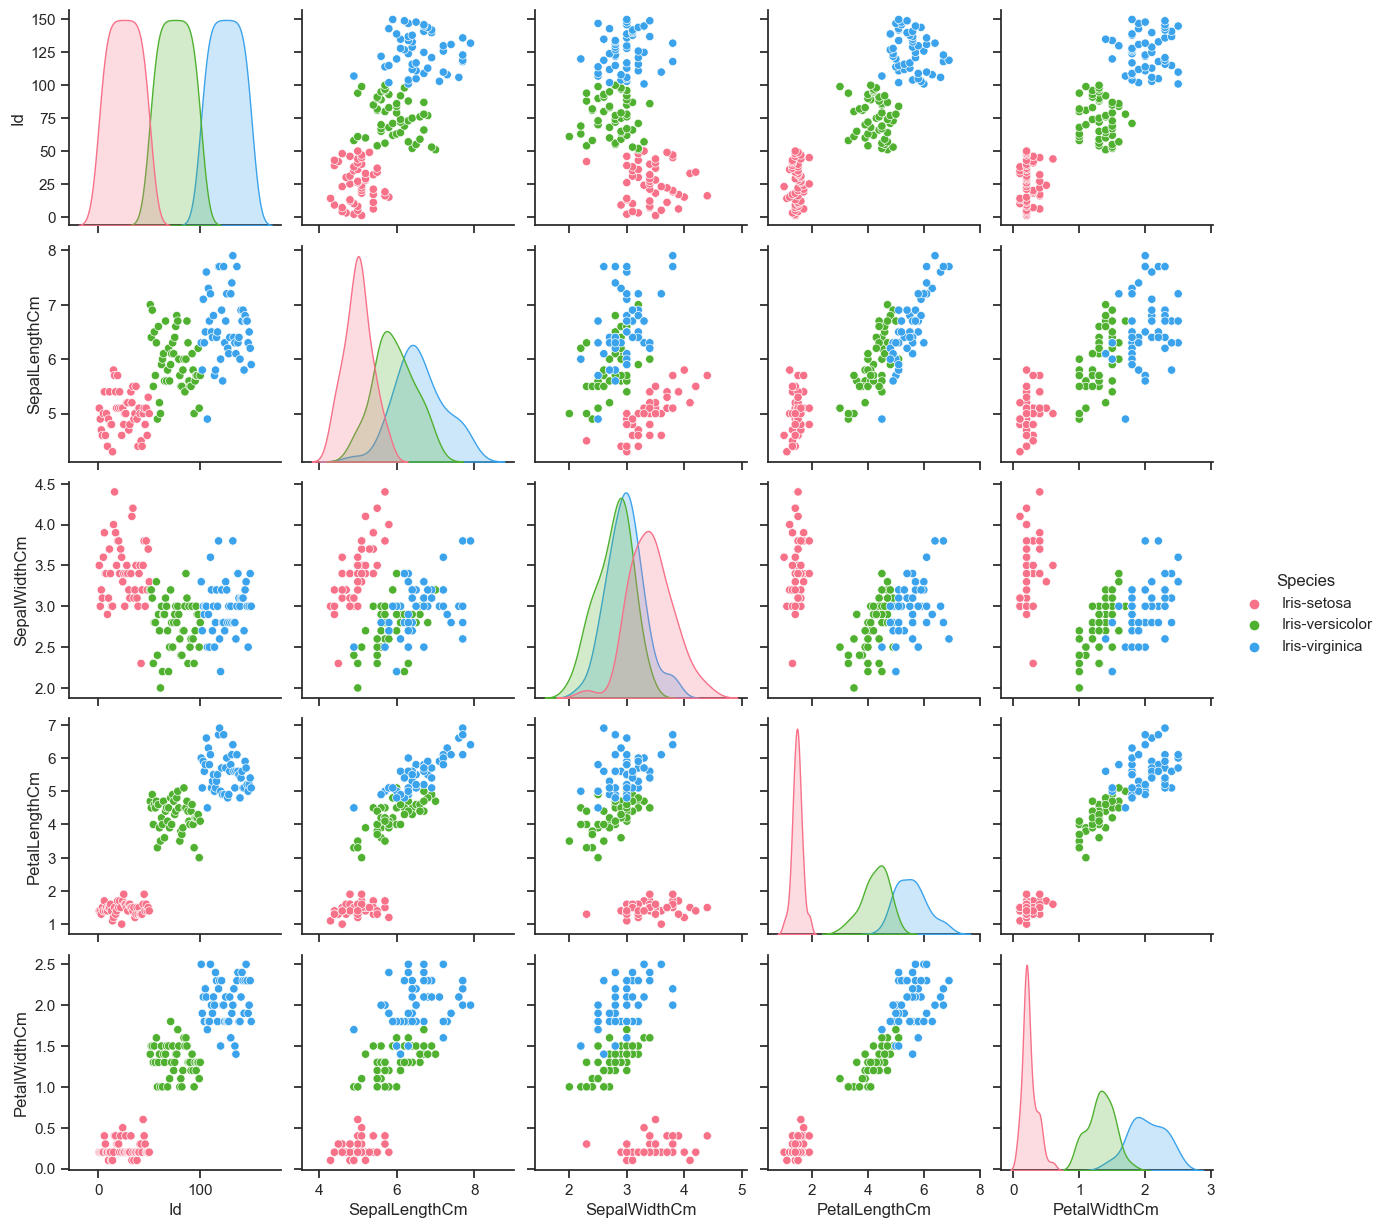

In [22]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, hue="Species", palette="husl")

<Axes: >

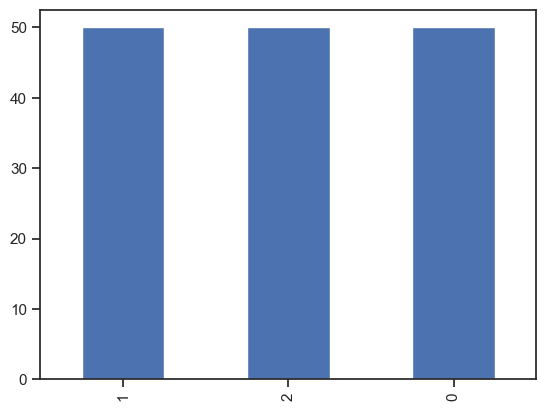

In [29]:
# Iris-virginica는 0, Iris-setosa는 1, Iris-versicolor는 2가 됨.
data['Species'] = data['Species'].replace(['Iris-virginica','Iris-setosa','Iris-versicolor'],[0,1,2])
data['Species'].value_counts().plot(kind='bar')

In [30]:
# X 데이터. 특성은 총 4개.
data_X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

# Y 데이터. 예측 대상.
data_y = data['Species'].values

print(data_X[:5])
print(data_y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[1 1 1 1 1]


In [31]:
# 훈련 데이터와 테스트 데이터를 8:2로 나눈다.
(X_train, X_test, y_train, y_test) = train_test_split(data_X, data_y, train_size=0.8, random_state=1)

# 원-핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])
print(y_test[:5])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


## 2. 소프트맥스 회귀

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, batch_size=1, validation_data=(X_test, y_test))

Epoch 1/200
120/120 [==============================] - 0s 1ms/step - loss: 3.3482 - accuracy: 0.3250 - val_loss: 1.9283 - val_accuracy: 0.3667
Epoch 2/200
120/120 [==============================] - 0s 472us/step - loss: 2.1526 - accuracy: 0.3417 - val_loss: 1.2315 - val_accuracy: 0.4333
Epoch 3/200
120/120 [==============================] - 0s 467us/step - loss: 1.4172 - accuracy: 0.3833 - val_loss: 0.8785 - val_accuracy: 0.6000
Epoch 4/200
120/120 [==============================] - 0s 463us/step - loss: 0.9715 - accuracy: 0.4500 - val_loss: 0.7768 - val_accuracy: 0.6333
Epoch 5/200
120/120 [==============================] - 0s 463us/step - loss: 0.8182 - accuracy: 0.4500 - val_loss: 0.7812 - val_accuracy: 0.4333
Epoch 6/200
120/120 [==============================] - 0s 464us/step - loss: 0.7780 - accuracy: 0.5333 - val_loss: 0.7735 - val_accuracy: 0.4667
Epoch 7/200
120/120 [==============================] - 0s 461us/step - loss: 0.7582 - accuracy: 0.5833 - val_loss: 0.7652 - val_accu

120/120 [==============================] - 0s 464us/step - loss: 0.3849 - accuracy: 0.9250 - val_loss: 0.4184 - val_accuracy: 0.7333
Epoch 58/200
120/120 [==============================] - 0s 462us/step - loss: 0.3834 - accuracy: 0.9250 - val_loss: 0.4312 - val_accuracy: 0.7333
Epoch 59/200
120/120 [==============================] - 0s 465us/step - loss: 0.3777 - accuracy: 0.8417 - val_loss: 0.4023 - val_accuracy: 0.8333
Epoch 60/200
120/120 [==============================] - 0s 463us/step - loss: 0.3750 - accuracy: 0.9333 - val_loss: 0.4153 - val_accuracy: 0.7333
Epoch 61/200
120/120 [==============================] - 0s 460us/step - loss: 0.3734 - accuracy: 0.9417 - val_loss: 0.4199 - val_accuracy: 0.7333
Epoch 62/200
120/120 [==============================] - 0s 464us/step - loss: 0.3685 - accuracy: 0.9000 - val_loss: 0.4056 - val_accuracy: 0.7667
Epoch 63/200
120/120 [==============================] - 0s 459us/step - loss: 0.3645 - accuracy: 0.9083 - val_loss: 0.4025 - val_accuracy

120/120 [==============================] - 0s 461us/step - loss: 0.2542 - accuracy: 0.9667 - val_loss: 0.2905 - val_accuracy: 0.9667
Epoch 114/200
120/120 [==============================] - 0s 463us/step - loss: 0.2501 - accuracy: 0.9750 - val_loss: 0.2998 - val_accuracy: 0.9000
Epoch 115/200
120/120 [==============================] - 0s 462us/step - loss: 0.2514 - accuracy: 0.9750 - val_loss: 0.2994 - val_accuracy: 0.9000
Epoch 116/200
120/120 [==============================] - 0s 463us/step - loss: 0.2461 - accuracy: 0.9667 - val_loss: 0.2844 - val_accuracy: 0.9667
Epoch 117/200
120/120 [==============================] - 0s 463us/step - loss: 0.2463 - accuracy: 0.9667 - val_loss: 0.2836 - val_accuracy: 0.9667
Epoch 118/200
120/120 [==============================] - 0s 461us/step - loss: 0.2444 - accuracy: 0.9667 - val_loss: 0.2722 - val_accuracy: 1.0000
Epoch 119/200
120/120 [==============================] - 0s 461us/step - loss: 0.2434 - accuracy: 0.9833 - val_loss: 0.2807 - val_ac

Epoch 169/200
120/120 [==============================] - 0s 462us/step - loss: 0.1862 - accuracy: 0.9833 - val_loss: 0.2340 - val_accuracy: 0.9333
Epoch 170/200
120/120 [==============================] - 0s 464us/step - loss: 0.1846 - accuracy: 0.9750 - val_loss: 0.2252 - val_accuracy: 0.9667
Epoch 171/200
120/120 [==============================] - 0s 462us/step - loss: 0.1835 - accuracy: 0.9750 - val_loss: 0.2145 - val_accuracy: 1.0000
Epoch 172/200
120/120 [==============================] - 0s 472us/step - loss: 0.1822 - accuracy: 0.9750 - val_loss: 0.2198 - val_accuracy: 1.0000
Epoch 173/200
120/120 [==============================] - 0s 462us/step - loss: 0.1826 - accuracy: 0.9750 - val_loss: 0.2221 - val_accuracy: 0.9667
Epoch 174/200
120/120 [==============================] - 0s 463us/step - loss: 0.1820 - accuracy: 0.9750 - val_loss: 0.2166 - val_accuracy: 1.0000
Epoch 175/200
120/120 [==============================] - 0s 464us/step - loss: 0.1806 - accuracy: 0.9750 - val_loss: 0

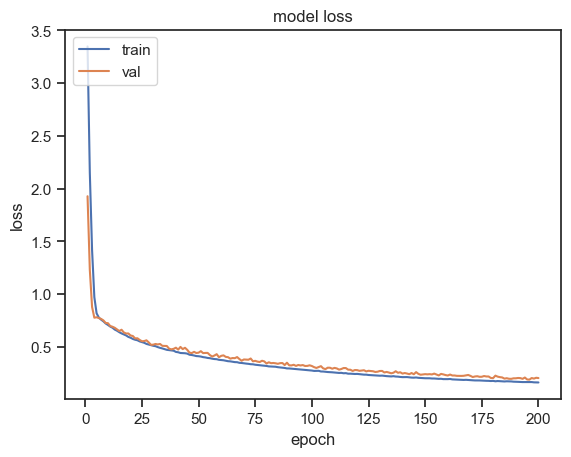

In [33]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [34]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

1/1 [==============================] - 0s 66ms/step - loss: 0.2048 - accuracy: 0.9667

 테스트 정확도: 0.9667
